In [1]:
%matplotlib notebook
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from astropy.io import fits

In [4]:
df = pd.read_csv('../finalcut_query_withradec.csv')
df

,Unnamed: 0,EXPNUM,CCDNUM,RADEG,DECDEG,PFW_ATTEMPT_ID,BAND,PATH,FILENAME,PATH.1,FILENAME.1
0,0,145430,22,0.582917,-29.720417,20926780,z,DEC/finalcut/Y5A1/20121101-r4148/D00145430/p01...,D00145430_z_c22_r4148p01_immasked.fits,DEC/finalcut/Y5A1/20121101-r4148/D00145430/p01...,D00145430_z_c22_r4148p01_psfexcat.psf
1,1,145434,22,0.760417,-29.800000,20926782,z,DEC/finalcut/Y5A1/20121101-r4148/D00145434/p01...,D00145434_z_c22_r4148p01_immasked.fits,DEC/finalcut/Y5A1/20121101-r4148/D00145434/p01...,D00145434_z_c22_r4148p01_psfexcat.psf
2,2,145506,22,36.080000,-4.273861,20956287,i,DEC/finalcut/Y5A1/20121101-r4148/D00145506/p02...,D00145506_i_c22_r4148p02_immasked.fits,DEC/finalcut/Y5A1/20121101-r4148/D00145506/p02...,D00145506_i_c22_r4148p02_psfexcat.psf
3,3,145507,22,35.895833,-4.258333,20956288,i,DEC/finalcut/Y5A1/20121101-r4148/D00145507/p02...,D00145507_i_c22_r4148p02_immasked.fits,DEC/finalcut/Y5A1/20121101-r4148/D00145507/p02...,D00145507_i_c22_r4148p02_psfexcat.psf
4,4,145516,22,0.582917,-29.720417,20926784,z,DEC/finalcut/Y5A1/20121101-r4148/D00145516/p01...,D00145516_z_c22_r4148p01_immasked.fits,DEC/finalcut/Y5A1/20121101-r4148/D00145516/p01...,D00145516_z_c22_r4148p01_psfexcat.psf
...,...,...,...,...,...,...,...,...,...,...,...
112113,112113,1071518,22,189.000000,12.100000,21619290,r,DEC/finalcut/Y5A1_taiga/20220112-r5843/D010715...,D01071518_r_c22_r5843p01_immasked.fits,DEC/finalcut/Y5A1_taiga/20220112-r5843/D010715...,D01071518_r_c22_r5843p01_psfexcat.psf
112114,112114,1071519,22,186.600000,12.300000,21619291,r,DEC/finalcut/Y5A1_taiga/20220112-r5843/D010715...,D01071519_r_c22_r5843p01_immasked.fits,DEC/finalcut/Y5A1_taiga/20220112-r5843/D010715...,D01071519_r_c22_r5843p01_psfexcat.psf
112115,112115,1071520,22,185.442104,12.386700,21619292,r,DEC/finalcut/Y5A1_taiga/20220112-r5843/D010715...,D01071520_r_c22_r5843p01_immasked.fits,DEC/finalcut/Y5A1_taiga/20220112-r5843/D010715...,D01071520_r_c22_r5843p01_psfexcat.psf
112116,112116,1074384,22,42.820004,0.000000,21614124,r,DEC/finalcut/Y5A1_taiga/20220120-r5820/D010743...,D01074384_r_c22_r5820p01_immasked.fits,DEC/finalcut/Y5A1_taiga/20220120-r5820/D010743...,D01074384_r_c22_r5820p01_psfexcat.psf


<IPython.core.display.Javascript object>


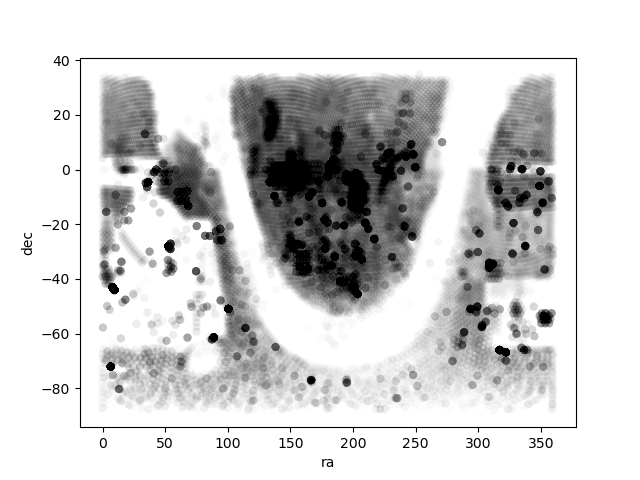

In [15]:
pl.figure()
pl.scatter(df['RADEG'],df['DECDEG'],marker='o',color='k',alpha=0.01,edgecolors='None')
pl.xlabel('ra')
pl.ylabel('dec')
pl.show()

<IPython.core.display.Javascript object>


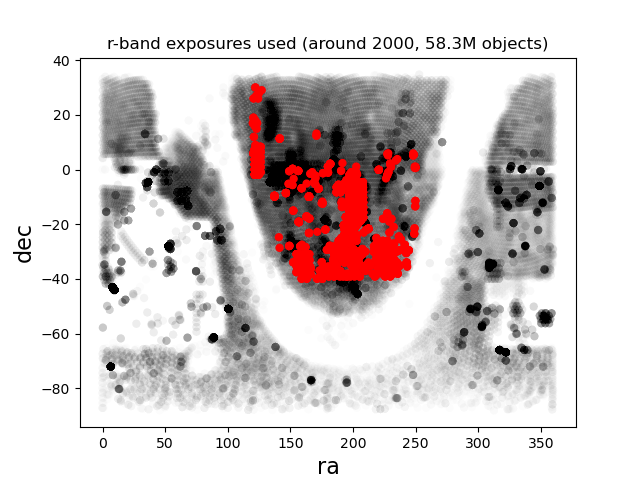

In [29]:
band = 'r'
band_select = (df['BAND']==band)
box_select = (df['RADEG']>120.0)*(df['RADEG']<250.0)*(df['DECDEG']>-40.0)*(df['DECDEG']<40.0)
final_select = band_select*box_select
exposures=df[final_select]# apply total masking
expnums = exposures['EXPNUM']

Nexp = 2000
pl.figure()
pl.title('r-band exposures used (around 2000, 58.3M objects)')
pl.scatter(df['RADEG'],df['DECDEG'],marker='o',color='k',alpha=0.01,edgecolors='None')
pl.scatter(exposures['RADEG'][0:Nexp],exposures['DECDEG'][0:Nexp],marker='o',color='r',alpha=1,edgecolors='None')
pl.xlabel('ra',fontsize=16)
pl.ylabel('dec',fontsize=16)
pl.show()


<IPython.core.display.Javascript object>


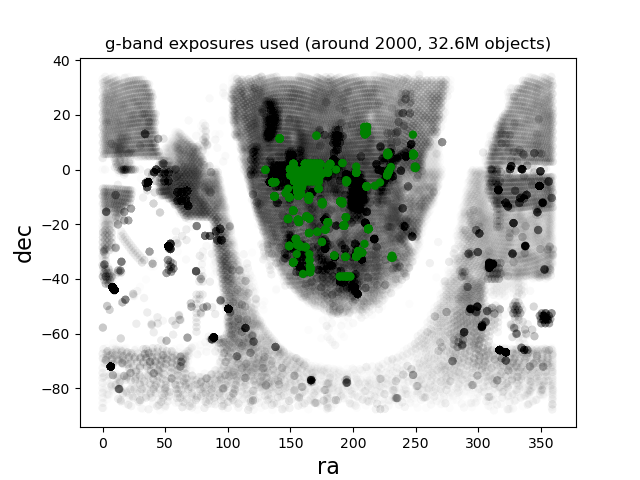

In [28]:
band = 'g'
band_select = (df['BAND']==band)
box_select = (df['RADEG']>120.0)*(df['RADEG']<250.0)*(df['DECDEG']>-40.0)*(df['DECDEG']<40.0)
final_select = band_select*box_select
exposures=df[final_select]# apply total masking
expnums = exposures['EXPNUM']

Nexp = 2000
pl.figure()
pl.title('g-band exposures used (around 2000, 32.6M objects)')
pl.scatter(df['RADEG'],df['DECDEG'],marker='o',color='k',alpha=0.01,edgecolors='None')
pl.scatter(exposures['RADEG'][0:Nexp],exposures['DECDEG'][0:Nexp],marker='o',color='g',alpha=1,edgecolors='None')
pl.xlabel('ra',fontsize=16)
pl.ylabel('dec',fontsize=16)
pl.show()


<IPython.core.display.Javascript object>


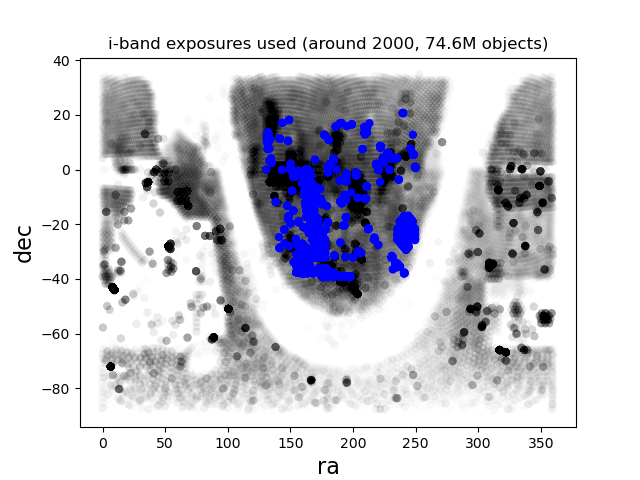

In [31]:
band = 'i'
band_select = (df['BAND']==band)
box_select = (df['RADEG']>120.0)*(df['RADEG']<250.0)*(df['DECDEG']>-40.0)*(df['DECDEG']<40.0)
final_select = band_select*box_select
exposures=df[final_select]# apply total masking
expnums = exposures['EXPNUM']

Nexp = 2000
pl.figure()
pl.title('i-band exposures used (around 2000, 74.6M objects)')
pl.scatter(df['RADEG'],df['DECDEG'],marker='o',color='k',alpha=0.01,edgecolors='None')
pl.scatter(exposures['RADEG'][0:Nexp],exposures['DECDEG'][0:Nexp],marker='o',color='b',alpha=1,edgecolors='None')
pl.xlabel('ra',fontsize=16)
pl.ylabel('dec',fontsize=16)
pl.show()


<IPython.core.display.Javascript object>


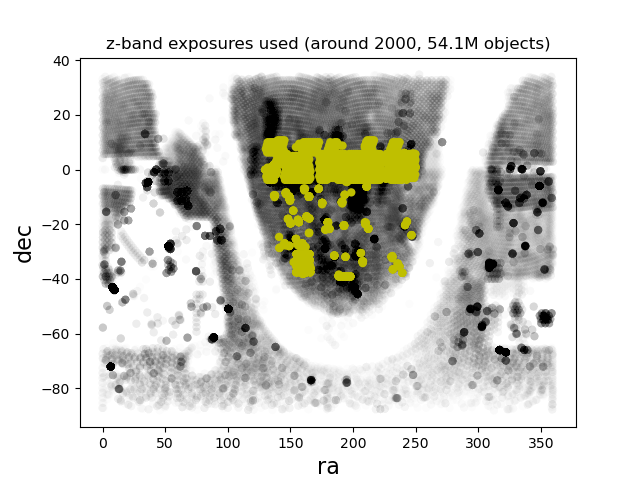

In [30]:
band = 'z'
band_select = (df['BAND']==band)
box_select = (df['RADEG']>120.0)*(df['RADEG']<250.0)*(df['DECDEG']>-40.0)*(df['DECDEG']<40.0)
final_select = band_select*box_select
exposures=df[final_select]# apply total masking
expnums = exposures['EXPNUM']

Nexp = 2000
pl.figure()
pl.title('z-band exposures used (around 2000, 54.1M objects)')
pl.scatter(df['RADEG'],df['DECDEG'],marker='o',color='k',alpha=0.01,edgecolors='None')
pl.scatter(exposures['RADEG'][0:Nexp],exposures['DECDEG'][0:Nexp],marker='o',color='y',alpha=1,edgecolors='None')
pl.xlabel('ra',fontsize=16)
pl.ylabel('dec',fontsize=16)
pl.show()

## actual rho stats plots

In [33]:
!head ../ouput_rhos/rho0_gband_bslop0.010_1995exposures.txt

## {'coords': 'spherical', 'metric': 'Euclidean', 'sep_units': 'arcmin', 'bin_type': 'Log'}
#   r_nom       meanr       meanlogr       xip          xim         xip_im       xim_im     sigma_xip    sigma_xim      weight       npairs   
  1.1694e-01   1.1930e-01  -2.1299e+00   4.9878e-03   1.2687e-04  -2.0292e-05  -1.9911e-04   1.9302e-07   1.9302e-07   3.3999e+08   3.3999e+08
  1.5991e-01   1.6266e-01  -1.8201e+00   4.9831e-03   7.5913e-05  -3.2871e-06  -3.3927e-05   1.4053e-07   1.4053e-07   6.4143e+08   6.4143e+08
  2.1867e-01   2.2328e-01  -1.5034e+00   5.1857e-03   1.0194e-04  -1.6022e-06   7.5444e-05   1.0135e-07   1.0135e-07   1.2331e+09   1.2331e+09
  2.9903e-01   3.0568e-01  -1.1892e+00   5.1682e-03  -1.0434e-04  -1.0784e-05   5.5097e-05   7.4783e-08   7.4783e-08   2.2650e+09   2.2650e+09
  4.0891e-01   4.1635e-01  -8.8022e-01   5.1691e-03  -1.3286e-04  -1.2919e-05  -4.4544e-05   5.5056e-08   5.5056e-08   4.1789e+09   4.1789e+09
  5.5917e-01   5.7029e-01  -5.6557e-01   5.1250e-0

In [66]:
Y3 = fits.open('/Users/secco/Documents/projects/ppd_stuff/external_dvs/2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits')
xip_des, xim_des = Y3['xip'].data['value'][0:20],Y3['xim'].data['value'][0:20]
ang_des = Y3['xip'].data['ang'][0:20]

<IPython.core.display.Javascript object>


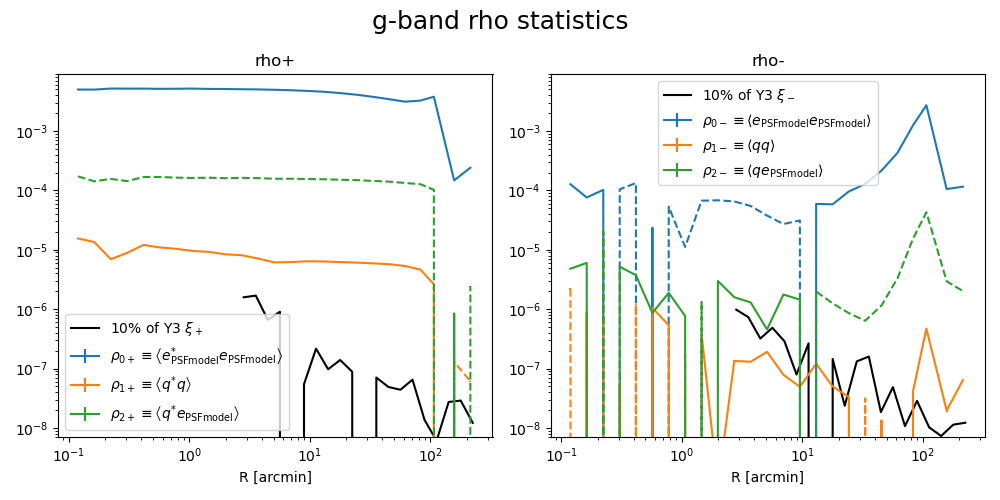

In [67]:
r0,rho0p,rho0m,rho0p_err,rho0m_err = np.loadtxt('../ouput_rhos/rho0_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r1,rho1p,rho1m,rho1p_err,rho1m_err = np.loadtxt('../ouput_rhos/rho1_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r2,rho2p,rho2m,rho2p_err,rho2m_err = np.loadtxt('../ouput_rhos/rho2_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))

pl.figure(figsize=(10,5))
pl.suptitle('g-band rho statistics',fontsize=18)
pl.subplot(121)
pl.xlabel('R [arcmin]')
pl.title('rho+')
pl.ylim(7e-9,9e-3)

pl.plot(ang_des,xip_des*0.1,label=r'10% of Y3 $\xi_+$',color='k')

pl.errorbar(r,rho0p,yerr=rho0p_err,label=r'$\rho_{0+} \equiv \left\langle e^{*}_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r,-rho0p,yerr=rho0p_err,ls='--',color='C0')

pl.errorbar(r,rho1p,yerr=rho1p_err,label=r'$\rho_{1+} \equiv \left\langle q^{*} q \right\rangle$',color='C1')
pl.errorbar(r,-rho1p,yerr=rho1p_err,ls='--',color='C1')

pl.errorbar(r,rho2p,yerr=rho2p_err,label=r'$\rho_{2+} \equiv \left\langle q^{*} e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r,-rho2p,yerr=rho2p_err,ls='--',color='C2')
pl.loglog()
pl.legend(loc=0)

pl.subplot(122)
pl.title('rho-')
pl.xlabel('R [arcmin]')
pl.plot(ang_des,xim_des*0.1,label=r'10% of Y3 $\xi_-$',color='k')
pl.ylim(7e-9,9e-3)
pl.errorbar(r0,rho0m,yerr=rho0m_err,label=r'$\rho_{0-} \equiv \left\langle e_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r0,-rho0m,yerr=rho0m_err,ls='--',color='C0')

pl.errorbar(r1,rho1m,yerr=rho1m_err,label=r'$\rho_{1-} \equiv \left\langle q q \right\rangle$',color='C1')
pl.errorbar(r1,-rho1m,yerr=rho1m_err,ls='--',color='C1')

pl.errorbar(r2,rho2m,yerr=rho2m_err,label=r'$\rho_{2-} \equiv \left\langle q e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r2,-rho2m,yerr=rho2m_err,ls='--',color='C2')

pl.legend(loc=0)
pl.loglog()
pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>


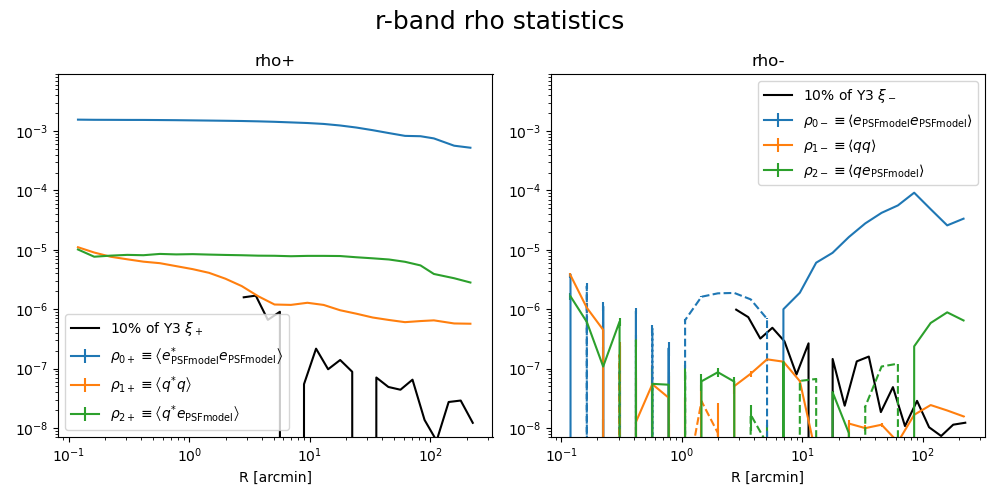

In [68]:
r0,rho0p,rho0m,rho0p_err,rho0m_err = np.loadtxt('../ouput_rhos/rho0_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r1,rho1p,rho1m,rho1p_err,rho1m_err = np.loadtxt('../ouput_rhos/rho1_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r2,rho2p,rho2m,rho2p_err,rho2m_err = np.loadtxt('../ouput_rhos/rho2_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))

pl.figure(figsize=(10,5))
pl.suptitle('r-band rho statistics',fontsize=18)
pl.subplot(121)
pl.xlabel('R [arcmin]')
pl.title('rho+')
pl.ylim(7e-9,9e-3)

pl.plot(ang_des,xip_des*0.1,label=r'10% of Y3 $\xi_+$',color='k')

pl.errorbar(r,rho0p,yerr=rho0p_err,label=r'$\rho_{0+} \equiv \left\langle e^{*}_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r,-rho0p,yerr=rho0p_err,ls='--',color='C0')

pl.errorbar(r,rho1p,yerr=rho1p_err,label=r'$\rho_{1+} \equiv \left\langle q^{*} q \right\rangle$',color='C1')
pl.errorbar(r,-rho1p,yerr=rho1p_err,ls='--',color='C1')

pl.errorbar(r,rho2p,yerr=rho2p_err,label=r'$\rho_{2+} \equiv \left\langle q^{*} e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r,-rho2p,yerr=rho2p_err,ls='--',color='C2')
pl.loglog()
pl.legend(loc=0)

pl.subplot(122)
pl.title('rho-')
pl.xlabel('R [arcmin]')
pl.plot(ang_des,xim_des*0.1,label=r'10% of Y3 $\xi_-$',color='k')
pl.ylim(7e-9,9e-3)
pl.errorbar(r0,rho0m,yerr=rho0m_err,label=r'$\rho_{0-} \equiv \left\langle e_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r0,-rho0m,yerr=rho0m_err,ls='--',color='C0')

pl.errorbar(r1,rho1m,yerr=rho1m_err,label=r'$\rho_{1-} \equiv \left\langle q q \right\rangle$',color='C1')
pl.errorbar(r1,-rho1m,yerr=rho1m_err,ls='--',color='C1')

pl.errorbar(r2,rho2m,yerr=rho2m_err,label=r'$\rho_{2-} \equiv \left\langle q e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r2,-rho2m,yerr=rho2m_err,ls='--',color='C2')

pl.legend(loc=0)
pl.loglog()
pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>


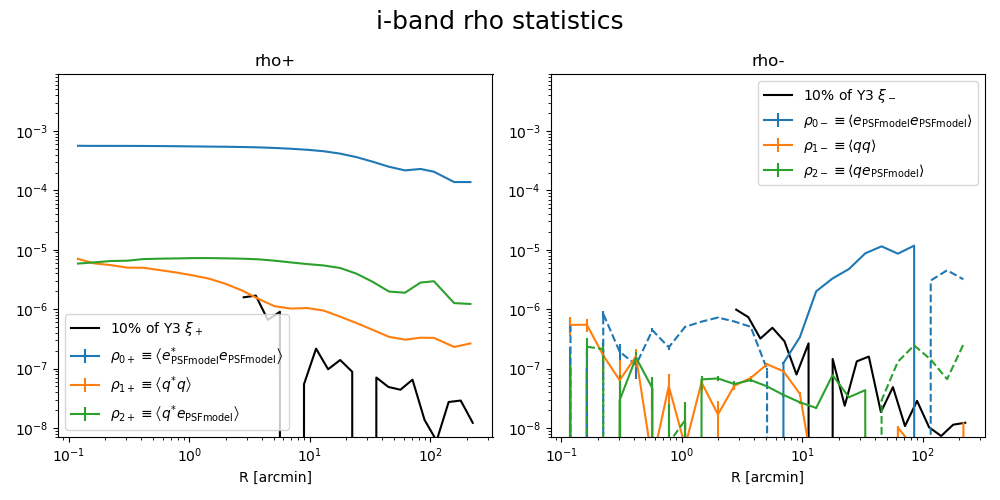

In [69]:
r0,rho0p,rho0m,rho0p_err,rho0m_err = np.loadtxt('../ouput_rhos/rho0_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r1,rho1p,rho1m,rho1p_err,rho1m_err = np.loadtxt('../ouput_rhos/rho1_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r2,rho2p,rho2m,rho2p_err,rho2m_err = np.loadtxt('../ouput_rhos/rho2_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))

pl.figure(figsize=(10,5))
pl.suptitle('i-band rho statistics',fontsize=18)
pl.subplot(121)
pl.xlabel('R [arcmin]')
pl.title('rho+')
pl.ylim(7e-9,9e-3)

pl.plot(ang_des,xip_des*0.1,label=r'10% of Y3 $\xi_+$',color='k')

pl.errorbar(r,rho0p,yerr=rho0p_err,label=r'$\rho_{0+} \equiv \left\langle e^{*}_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r,-rho0p,yerr=rho0p_err,ls='--',color='C0')

pl.errorbar(r,rho1p,yerr=rho1p_err,label=r'$\rho_{1+} \equiv \left\langle q^{*} q \right\rangle$',color='C1')
pl.errorbar(r,-rho1p,yerr=rho1p_err,ls='--',color='C1')

pl.errorbar(r,rho2p,yerr=rho2p_err,label=r'$\rho_{2+} \equiv \left\langle q^{*} e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r,-rho2p,yerr=rho2p_err,ls='--',color='C2')
pl.loglog()
pl.legend(loc=0)

pl.subplot(122)
pl.title('rho-')
pl.xlabel('R [arcmin]')
pl.plot(ang_des,xim_des*0.1,label=r'10% of Y3 $\xi_-$',color='k')
pl.ylim(7e-9,9e-3)
pl.errorbar(r0,rho0m,yerr=rho0m_err,label=r'$\rho_{0-} \equiv \left\langle e_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r0,-rho0m,yerr=rho0m_err,ls='--',color='C0')

pl.errorbar(r1,rho1m,yerr=rho1m_err,label=r'$\rho_{1-} \equiv \left\langle q q \right\rangle$',color='C1')
pl.errorbar(r1,-rho1m,yerr=rho1m_err,ls='--',color='C1')

pl.errorbar(r2,rho2m,yerr=rho2m_err,label=r'$\rho_{2-} \equiv \left\langle q e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r2,-rho2m,yerr=rho2m_err,ls='--',color='C2')

pl.legend(loc=0)
pl.loglog()
pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>


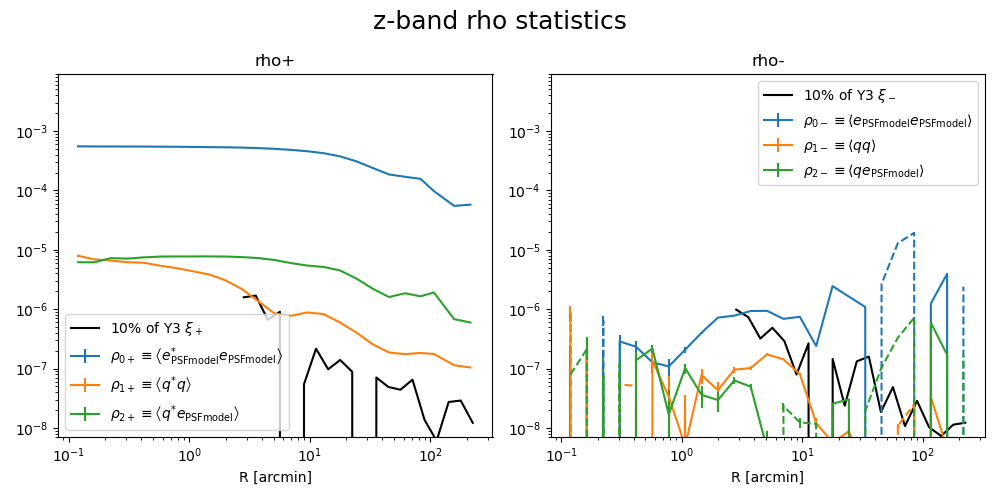

In [70]:
r0,rho0p,rho0m,rho0p_err,rho0m_err = np.loadtxt('../ouput_rhos/rho0_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r1,rho1p,rho1m,rho1p_err,rho1m_err = np.loadtxt('../ouput_rhos/rho1_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))
r2,rho2p,rho2m,rho2p_err,rho2m_err = np.loadtxt('../ouput_rhos/rho2_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,4,7,8))

pl.figure(figsize=(10,5))
pl.suptitle('z-band rho statistics',fontsize=18)
pl.subplot(121)
pl.xlabel('R [arcmin]')
pl.title('rho+')
pl.ylim(7e-9,9e-3)

pl.plot(ang_des,xip_des*0.1,label=r'10% of Y3 $\xi_+$',color='k')

pl.errorbar(r,rho0p,yerr=rho0p_err,label=r'$\rho_{0+} \equiv \left\langle e^{*}_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r,-rho0p,yerr=rho0p_err,ls='--',color='C0')

pl.errorbar(r,rho1p,yerr=rho1p_err,label=r'$\rho_{1+} \equiv \left\langle q^{*} q \right\rangle$',color='C1')
pl.errorbar(r,-rho1p,yerr=rho1p_err,ls='--',color='C1')

pl.errorbar(r,rho2p,yerr=rho2p_err,label=r'$\rho_{2+} \equiv \left\langle q^{*} e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r,-rho2p,yerr=rho2p_err,ls='--',color='C2')
pl.loglog()
pl.legend(loc=0)

pl.subplot(122)
pl.title('rho-')
pl.xlabel('R [arcmin]')
pl.plot(ang_des,xim_des*0.1,label=r'10% of Y3 $\xi_-$',color='k')
pl.ylim(7e-9,9e-3)
pl.errorbar(r0,rho0m,yerr=rho0m_err,label=r'$\rho_{0-} \equiv \left\langle e_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',color='C0')
pl.errorbar(r0,-rho0m,yerr=rho0m_err,ls='--',color='C0')

pl.errorbar(r1,rho1m,yerr=rho1m_err,label=r'$\rho_{1-} \equiv \left\langle q q \right\rangle$',color='C1')
pl.errorbar(r1,-rho1m,yerr=rho1m_err,ls='--',color='C1')

pl.errorbar(r2,rho2m,yerr=rho2m_err,label=r'$\rho_{2-} \equiv \left\langle q e_{\mathrm{PSFmodel}} \right\rangle$',color='C2')
pl.errorbar(r2,-rho2m,yerr=rho2m_err,ls='--',color='C2')

pl.legend(loc=0)
pl.loglog()
pl.tight_layout()
pl.show()

# simplified plots below
People usually quote only the "+" version of the $\rho(\theta)$ correlations as a diagnostic, which makes sense based on eg. the S/N of the curves seen above. So simplifying the above plots here, and also including the DES Y1 and Y3 version of the same thing

<IPython.core.display.Javascript object>


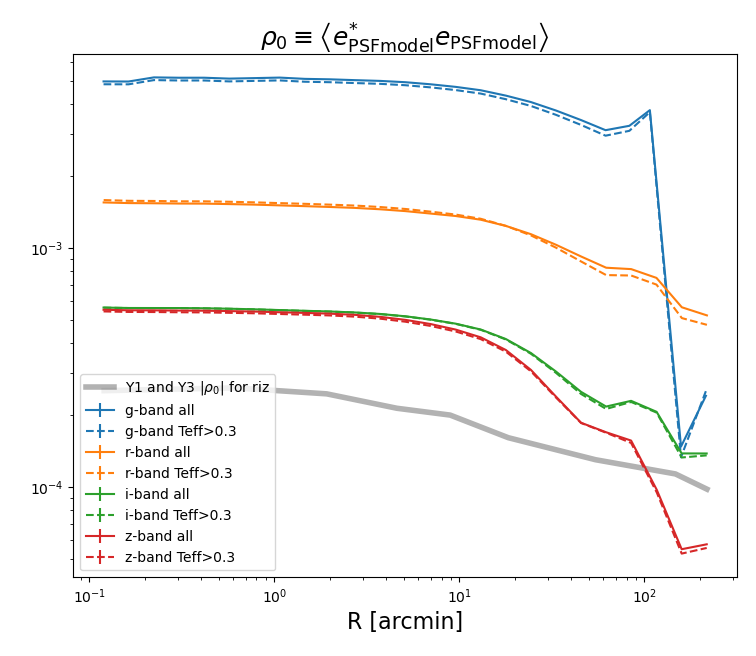

In [9]:
y1_rho0_R, y1_rho0 = np.loadtxt('../output_rhos/DES_rho0.txt',unpack=True)


r0g,rho0g,rho0g_err = np.loadtxt('../output_rhos/rho0_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0g_teff,rho0g_teff,rho0g_err_teff = np.loadtxt('../output_rhos/rho0_gband_bslop0.010_1841exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0r,rho0r,rho0r_err = np.loadtxt('../output_rhos/rho0_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0r_teff,rho0r_teff,rho0r_err_teff = np.loadtxt('../output_rhos/rho0_rband_bslop0.010_1619exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0i,rho0i,rho0i_err = np.loadtxt('../output_rhos/rho0_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0i_teff,rho0i_teff,rho0i_err_teff = np.loadtxt('../output_rhos/rho0_iband_bslop0.010_1869exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0z,rho0z,rho0z_err = np.loadtxt('../output_rhos/rho0_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0z_teff,rho0z_teff,rho0z_err_teff = np.loadtxt('../output_rhos/rho0_zband_bslop0.010_1911exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))


pl.figure(figsize=(6,6))
pl.title(r'$\rho_0 \equiv \left\langle e^{*}_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',fontsize=18)
pl.xlabel('R [arcmin]',fontsize=16)
#pl.ylim(7e-9,9e-3)

pl.errorbar(r0g,rho0g,yerr=rho0g_err,label=r'g-band all',color='C0')
pl.errorbar(r0g,rho0g_teff,yerr=rho0g_err_teff,label=r'g-band Teff>0.3 ',color='C0',ls='--')

pl.errorbar(r0r,rho0r,yerr=rho0r_err,label=r'r-band all',color='C1')
pl.errorbar(r0r,rho0r_teff,yerr=rho0r_err_teff,label=r'r-band Teff>0.3 ',color='C1',ls='--')

pl.errorbar(r0i,rho0i,yerr=rho0i_err,label=r'i-band all',color='C2')
pl.errorbar(r0i,rho0i_teff,yerr=rho0i_err_teff,label=r'i-band Teff>0.3 ',color='C2',ls='--')

pl.errorbar(r0z,rho0z,yerr=rho0z_err,label=r'z-band all',color='C3')
pl.errorbar(r0z,rho0z_teff,yerr=rho0z_err_teff,label=r'z-band Teff>0.3 ',color='C3',ls='--')

pl.plot(y1_rho0_R,y1_rho0,label=r'Y1 and Y3 $|\rho_0|$ for riz',color='k',lw=4.0,alpha=0.3)

pl.loglog()
pl.legend(loc=0)

pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>


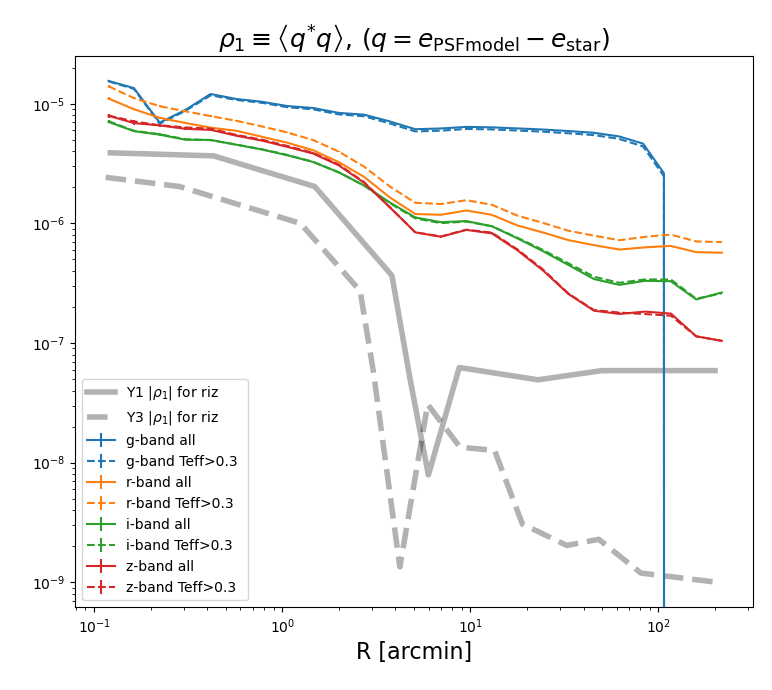

In [15]:
y1_rho0_R, y1_rho0 = np.loadtxt('../output_rhos/DESy1_rho1.txt',unpack=True)
y3_rho0_R, y3_rho0 = np.loadtxt('../output_rhos/DESy3_rho1.txt',unpack=True)

r0g,rho0g,rho0g_err = np.loadtxt('../output_rhos/rho1_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0g_teff,rho0g_teff,rho0g_err_teff = np.loadtxt('../output_rhos/rho1_gband_bslop0.010_1841exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0r,rho0r,rho0r_err = np.loadtxt('../output_rhos/rho1_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0r_teff,rho0r_teff,rho0r_err_teff = np.loadtxt('../output_rhos/rho1_rband_bslop0.010_1619exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0i,rho0i,rho0i_err = np.loadtxt('../output_rhos/rho1_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0i_teff,rho0i_teff,rho0i_err_teff = np.loadtxt('../output_rhos/rho1_iband_bslop0.010_1869exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0z,rho0z,rho0z_err = np.loadtxt('../output_rhos/rho1_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0z_teff,rho0z_teff,rho0z_err_teff = np.loadtxt('../output_rhos/rho1_zband_bslop0.010_1911exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))


pl.figure(figsize=(6,6))
pl.title(r'$\rho_1 \equiv \left\langle q^{*} q \right\rangle , \,(q=e_{\mathrm{PSFmodel}}-e_{\mathrm{star}})$',fontsize=18)
pl.xlabel('R [arcmin]',fontsize=16)
#pl.ylim(7e-9,9e-3)

pl.errorbar(r0g,rho0g,yerr=rho0g_err,label=r'g-band all',color='C0')
pl.errorbar(r0g,rho0g_teff,yerr=rho0g_err_teff,label=r'g-band Teff>0.3 ',color='C0',ls='--')

pl.errorbar(r0r,rho0r,yerr=rho0r_err,label=r'r-band all',color='C1')
pl.errorbar(r0r,rho0r_teff,yerr=rho0r_err_teff,label=r'r-band Teff>0.3 ',color='C1',ls='--')

pl.errorbar(r0i,rho0i,yerr=rho0i_err,label=r'i-band all',color='C2')
pl.errorbar(r0i,rho0i_teff,yerr=rho0i_err_teff,label=r'i-band Teff>0.3 ',color='C2',ls='--')

pl.errorbar(r0z,rho0z,yerr=rho0z_err,label=r'z-band all',color='C3')
pl.errorbar(r0z,rho0z_teff,yerr=rho0z_err_teff,label=r'z-band Teff>0.3 ',color='C3',ls='--')

pl.plot(y1_rho0_R,y1_rho0,label=r'Y1 $|\rho_1|$ for riz',color='k',lw=4.0,alpha=0.3)
pl.plot(y3_rho0_R,y3_rho0,label=r'Y3 $|\rho_1|$ for riz',color='k',lw=4.0,alpha=0.3,ls='--')

pl.loglog()
pl.legend(loc=0)

pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>


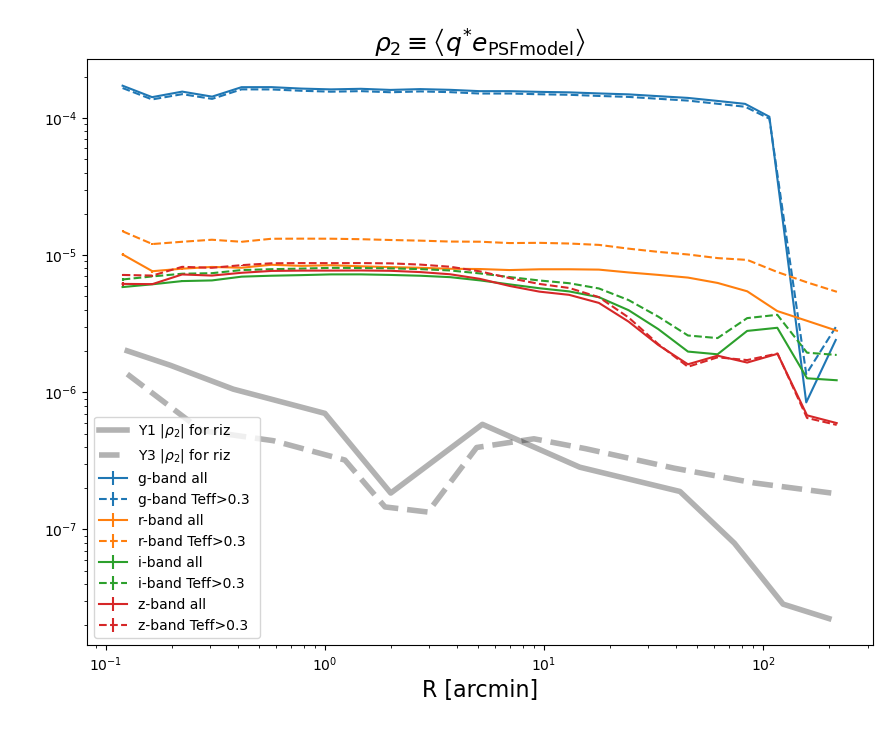

In [17]:
y1_rho0_R, y1_rho0 = np.loadtxt('../output_rhos/DESy1_rho2.txt',unpack=True)
y3_rho0_R, y3_rho0 = np.loadtxt('../output_rhos/DESy3_rho2.txt',unpack=True)

r0g,rho0g,rho0g_err = np.loadtxt('../output_rhos/rho2_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0g_teff,rho0g_teff,rho0g_err_teff = np.loadtxt('../output_rhos/rho2_gband_bslop0.010_1841exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0r,rho0r,rho0r_err = np.loadtxt('../output_rhos/rho2_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0r_teff,rho0r_teff,rho0r_err_teff = np.loadtxt('../output_rhos/rho2_rband_bslop0.010_1619exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0i,rho0i,rho0i_err = np.loadtxt('../output_rhos/rho2_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0i_teff,rho0i_teff,rho0i_err_teff = np.loadtxt('../output_rhos/rho2_iband_bslop0.010_1869exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))

r0z,rho0z,rho0z_err = np.loadtxt('../output_rhos/rho2_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,7))
r0z_teff,rho0z_teff,rho0z_err_teff = np.loadtxt('../output_rhos/rho2_zband_bslop0.010_1911exposures_teff0.3.txt',
                                               unpack=True,usecols=(1,3,7))


pl.figure(figsize=(6,6))
pl.title(r'$\rho_2 \equiv \left\langle q^{*} e_{\mathrm{PSFmodel}} \right\rangle$',fontsize=18)
pl.xlabel('R [arcmin]',fontsize=16)
#pl.ylim(7e-9,9e-3)

pl.errorbar(r0g,np.abs(rho0g),yerr=rho0g_err,label=r'g-band all',color='C0')
pl.errorbar(r0g,np.abs(rho0g_teff),yerr=rho0g_err_teff,label=r'g-band Teff>0.3 ',color='C0',ls='--')

pl.errorbar(r0r,rho0r,yerr=rho0r_err,label=r'r-band all',color='C1')
pl.errorbar(r0r,rho0r_teff,yerr=rho0r_err_teff,label=r'r-band Teff>0.3 ',color='C1',ls='--')

pl.errorbar(r0i,rho0i,yerr=rho0i_err,label=r'i-band all',color='C2')
pl.errorbar(r0i,rho0i_teff,yerr=rho0i_err_teff,label=r'i-band Teff>0.3 ',color='C2',ls='--')

pl.errorbar(r0z,rho0z,yerr=rho0z_err,label=r'z-band all',color='C3')
pl.errorbar(r0z,rho0z_teff,yerr=rho0z_err_teff,label=r'z-band Teff>0.3 ',color='C3',ls='--')

pl.plot(y1_rho0_R,y1_rho0,label=r'Y1 $|\rho_2|$ for riz',color='k',lw=4.0,alpha=0.3)
pl.plot(y3_rho0_R,y3_rho0,label=r'Y3 $|\rho_2|$ for riz',color='k',lw=4.0,alpha=0.3,ls='--')

pl.loglog()
pl.legend(loc=0)

pl.tight_layout()
pl.show()

# now HSM runs:

<IPython.core.display.Javascript object>


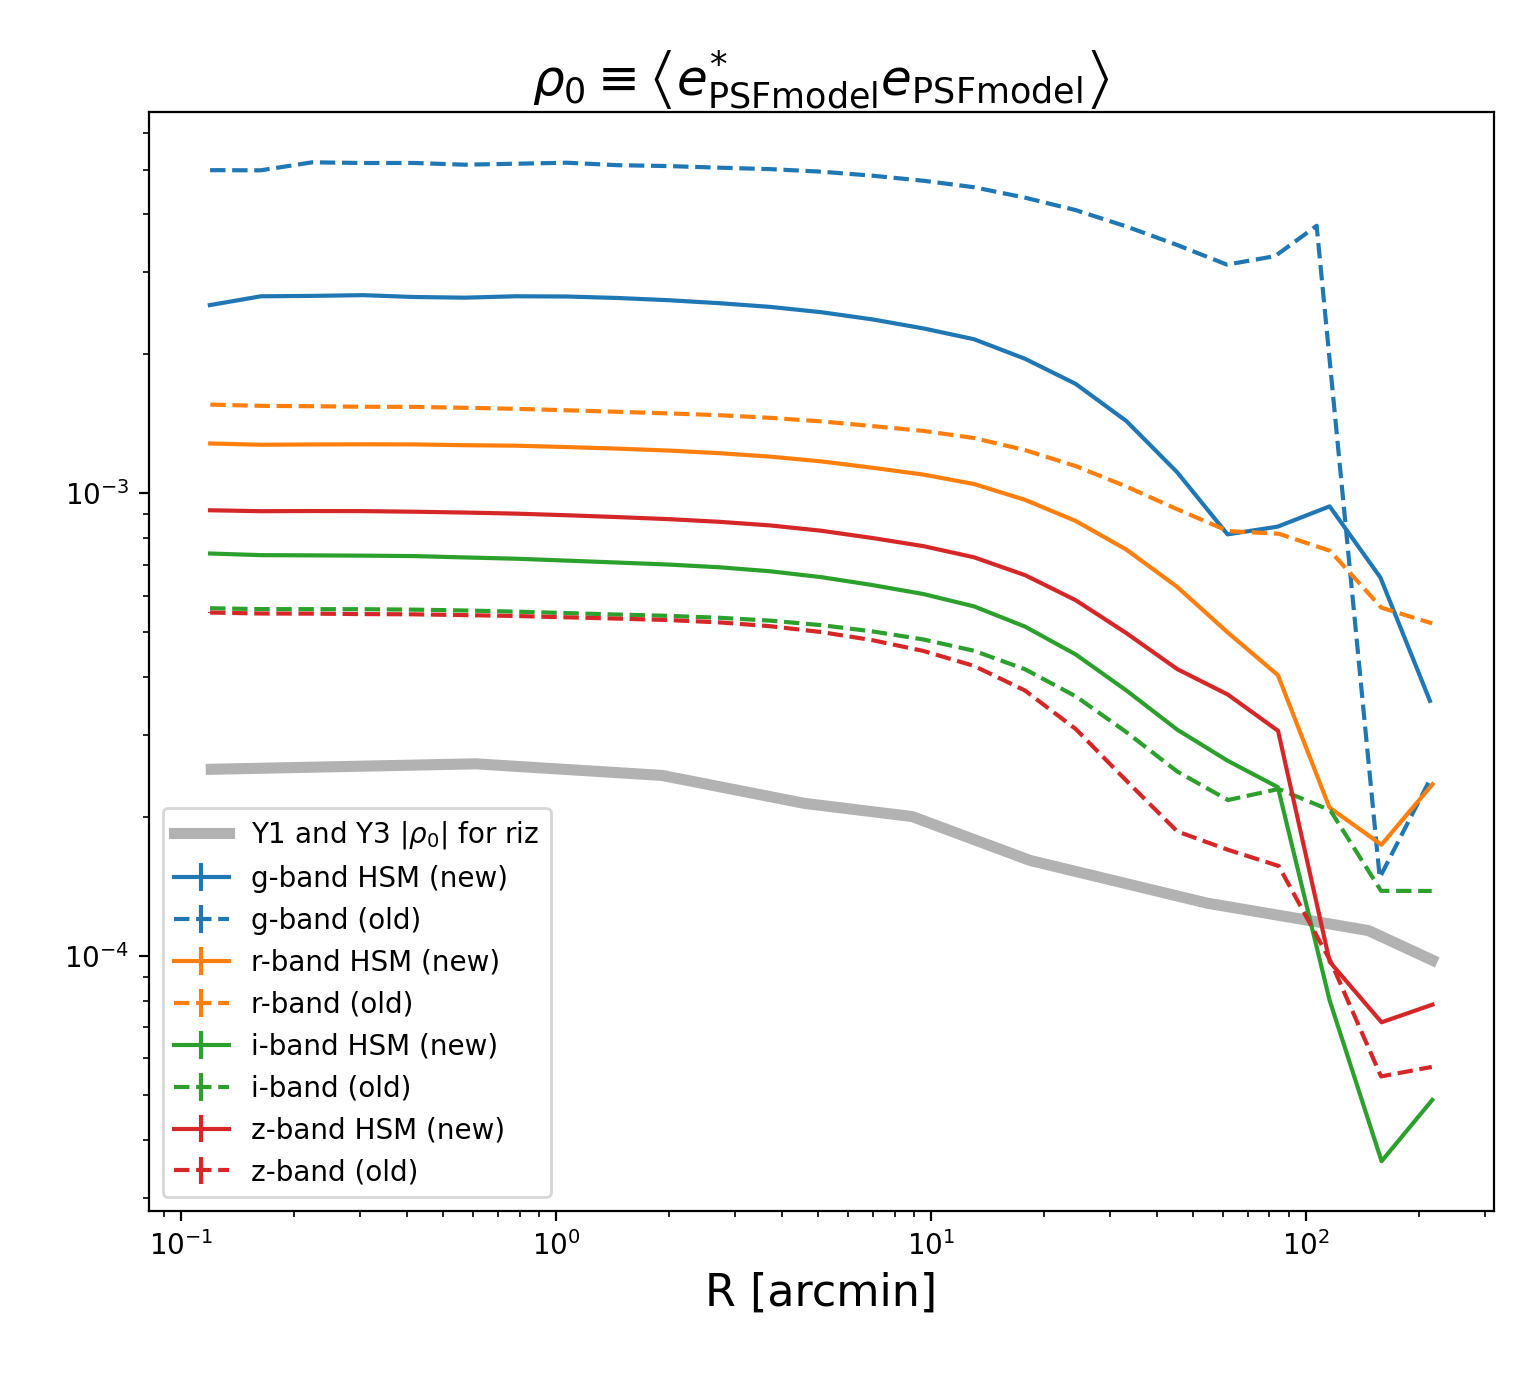

In [4]:
y1_rho0_R, y1_rho0 = np.loadtxt('../output_rhos/DES_rho0.txt',unpack=True)


r0g_hsm,rho0g_hsm,rho0g_err_hsm = np.loadtxt('../output_rhos/rho0_gband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0g,rho0g,rho0g_err = np.loadtxt('../output_rhos/rho0_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,7))


r0r_hsm,rho0r_hsm,rho0r_err_hsm = np.loadtxt('../output_rhos/rho0_rband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0r,rho0r,rho0r_err = np.loadtxt('../output_rhos/rho0_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,7))


r0i_hsm,rho0i_hsm,rho0i_err_hsm = np.loadtxt('../output_rhos/rho0_iband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0i,rho0i,rho0i_err = np.loadtxt('../output_rhos/rho0_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,7))

r0z_hsm,rho0z_hsm,rho0z_err_hsm = np.loadtxt('../output_rhos/rho0_zband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0z,rho0z,rho0z_err = np.loadtxt('../output_rhos/rho0_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,7))


pl.figure(figsize=(6,6))
pl.title(r'$\rho_0 \equiv \left\langle e^{*}_{\mathrm{PSFmodel}} e_{\mathrm{PSFmodel}} \right\rangle$',fontsize=18)
pl.xlabel('R [arcmin]',fontsize=16)
#pl.ylim(7e-9,9e-3)

pl.errorbar(r0g_hsm,rho0g_hsm,yerr=rho0g_err_hsm,label=r'g-band HSM (new)',color='C0')
pl.errorbar(r0g,rho0g,yerr=rho0g_err,label=r'g-band (old)',color='C0',ls='--')

pl.errorbar(r0r_hsm,rho0r_hsm,yerr=rho0r_err_hsm,label=r'r-band HSM (new)',color='C1')
pl.errorbar(r0r,rho0r,yerr=rho0r_err,label=r'r-band (old)',color='C1',ls='--')

pl.errorbar(r0i_hsm,rho0i_hsm,yerr=rho0i_err_hsm,label=r'i-band HSM (new)',color='C2')
pl.errorbar(r0i,rho0i,yerr=rho0i_err,label=r'i-band (old)',color='C2',ls='--')

pl.errorbar(r0z_hsm,rho0z_hsm,yerr=rho0z_err_hsm,label=r'z-band HSM (new)',color='C3')
pl.errorbar(r0z,rho0z,yerr=rho0z_err,label=r'z-band (old)',color='C3',ls='--')

pl.plot(y1_rho0_R,y1_rho0,label=r'Y1 and Y3 $|\rho_0|$ for riz',color='k',lw=4.0,alpha=0.3)

pl.loglog()
pl.legend(loc=0)

pl.tight_layout()
pl.show()

<IPython.core.display.Javascript object>


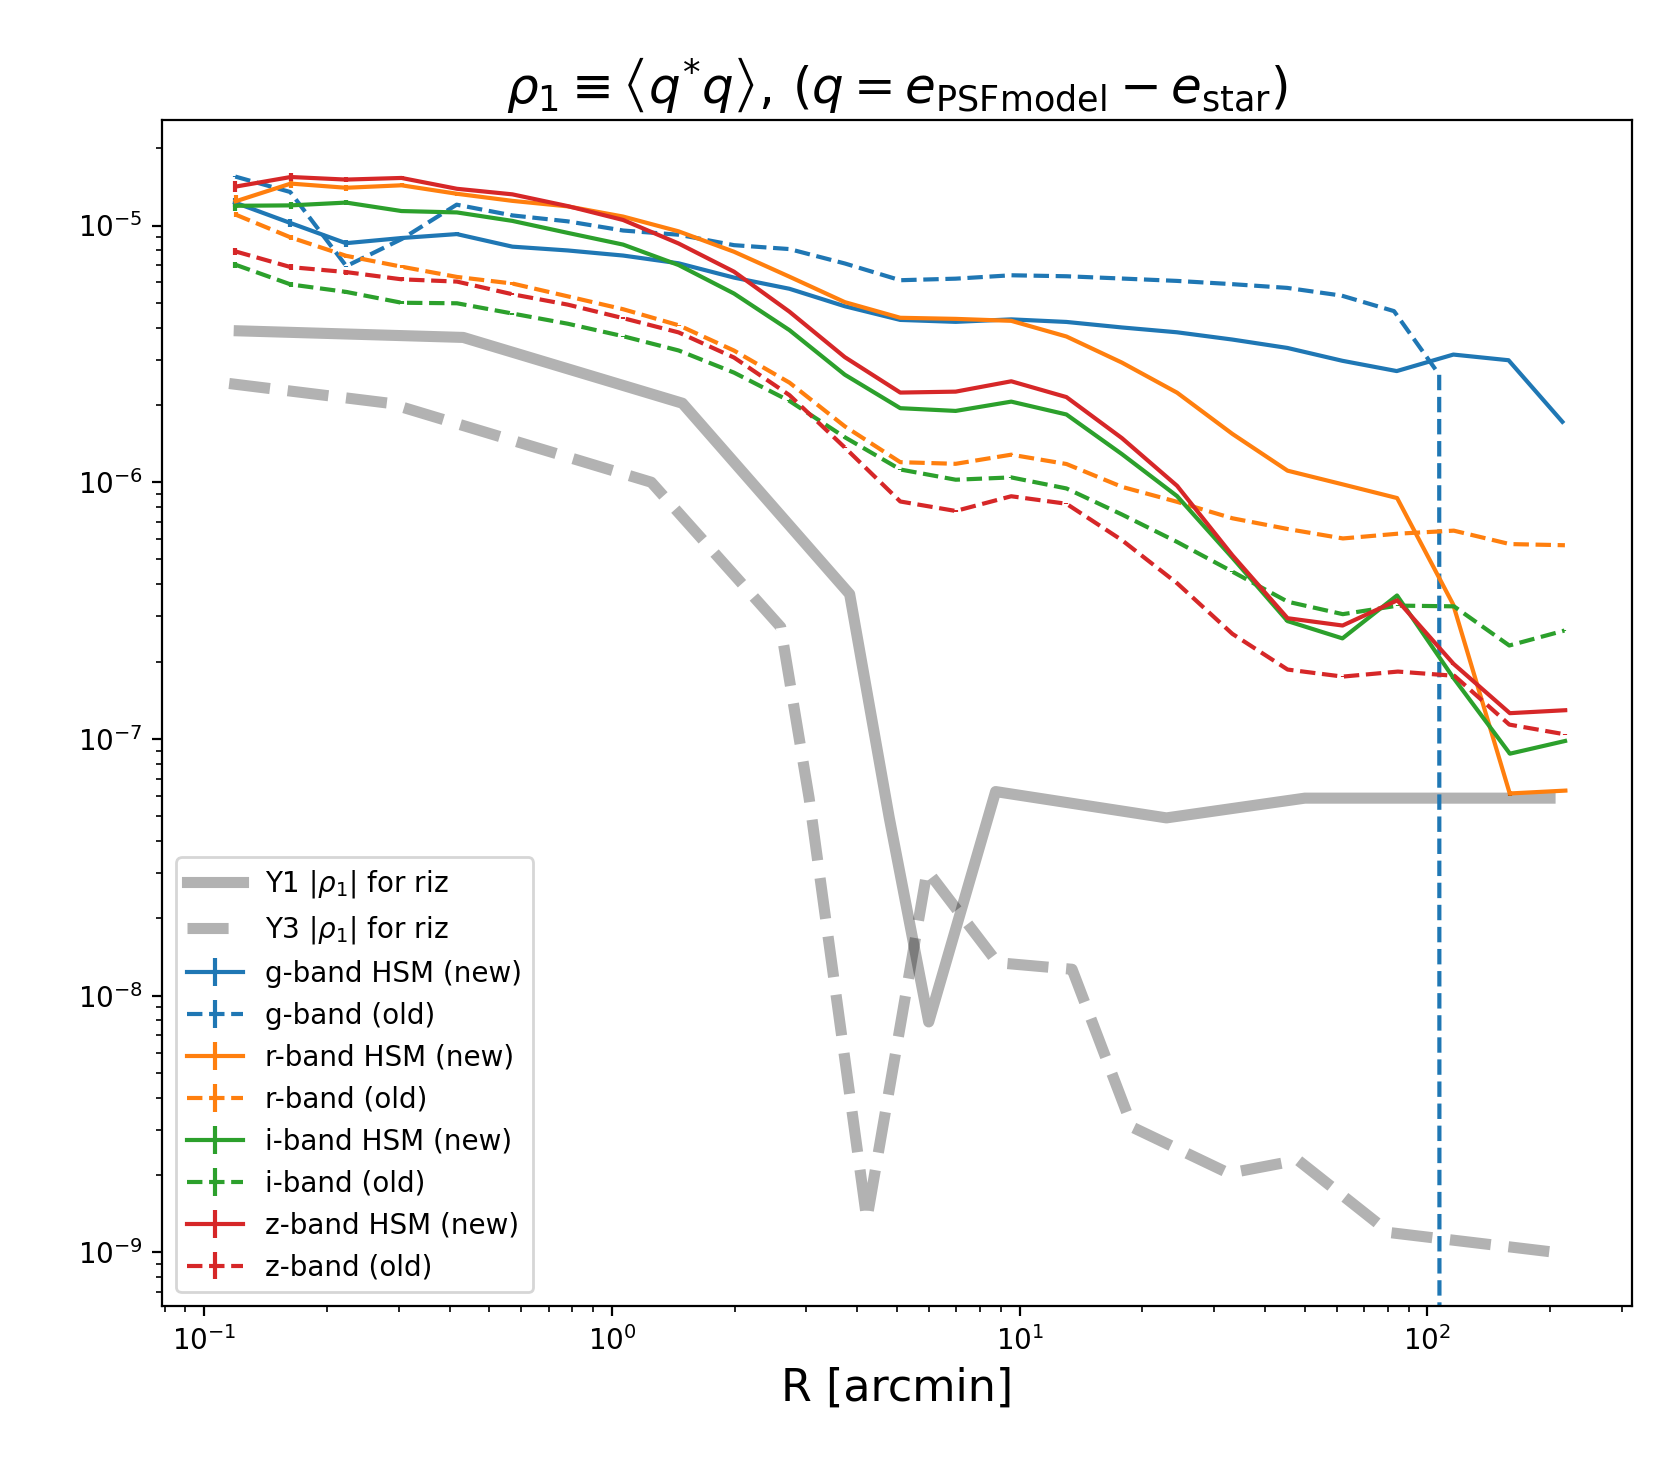

In [5]:
y1_rho0_R, y1_rho0 = np.loadtxt('../output_rhos/DESy1_rho1.txt',unpack=True)
y3_rho0_R, y3_rho0 = np.loadtxt('../output_rhos/DESy3_rho1.txt',unpack=True)

r0g_hsm,rho0g_hsm,rho0g_err_hsm = np.loadtxt('../output_rhos/rho1_gband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0g,rho0g,rho0g_err = np.loadtxt('../output_rhos/rho1_gband_bslop0.010_1995exposures.txt',
                                               unpack=True,usecols=(1,3,7))


r0r_hsm,rho0r_hsm,rho0r_err_hsm = np.loadtxt('../output_rhos/rho1_rband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0r,rho0r,rho0r_err = np.loadtxt('../output_rhos/rho1_rband_bslop0.010_2058exposures.txt',
                                               unpack=True,usecols=(1,3,7))


r0i_hsm,rho0i_hsm,rho0i_err_hsm = np.loadtxt('../output_rhos/rho1_iband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0i,rho0i,rho0i_err = np.loadtxt('../output_rhos/rho1_iband_bslop0.010_1992exposures.txt',
                                               unpack=True,usecols=(1,3,7))

r0z_hsm,rho0z_hsm,rho0z_err_hsm = np.loadtxt('../output_rhos/rho1_zband_bslop0.050_500exposures_HSM.txt',
                                               unpack=True,usecols=(1,3,7))
r0z,rho0z,rho0z_err = np.loadtxt('../output_rhos/rho1_zband_bslop0.010_1990exposures.txt',
                                               unpack=True,usecols=(1,3,7))


pl.figure(figsize=(6,6))
pl.title(r'$\rho_1 \equiv \left\langle q^{*} q \right\rangle , \,(q=e_{\mathrm{PSFmodel}}-e_{\mathrm{star}})$',fontsize=18)

pl.xlabel('R [arcmin]',fontsize=16)
#pl.ylim(7e-9,9e-3)

pl.errorbar(r0g_hsm,rho0g_hsm,yerr=rho0g_err_hsm,label=r'g-band HSM (new)',color='C0')
pl.errorbar(r0g,rho0g,yerr=rho0g_err,label=r'g-band (old)',color='C0',ls='--')

pl.errorbar(r0r_hsm,rho0r_hsm,yerr=rho0r_err_hsm,label=r'r-band HSM (new)',color='C1')
pl.errorbar(r0r,rho0r,yerr=rho0r_err,label=r'r-band (old)',color='C1',ls='--')

pl.errorbar(r0i_hsm,rho0i_hsm,yerr=rho0i_err_hsm,label=r'i-band HSM (new)',color='C2')
pl.errorbar(r0i,rho0i,yerr=rho0i_err,label=r'i-band (old)',color='C2',ls='--')

pl.errorbar(r0z_hsm,rho0z_hsm,yerr=rho0z_err_hsm,label=r'z-band HSM (new)',color='C3')
pl.errorbar(r0z,rho0z,yerr=rho0z_err,label=r'z-band (old)',color='C3',ls='--')


pl.plot(y1_rho0_R,y1_rho0,label=r'Y1 $|\rho_1|$ for riz',color='k',lw=4.0,alpha=0.3)
pl.plot(y3_rho0_R,y3_rho0,label=r'Y3 $|\rho_1|$ for riz',color='k',lw=4.0,alpha=0.3,ls='--')

pl.loglog()
pl.legend(loc=0)

pl.tight_layout()
pl.show()